In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [107]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report

In [108]:
X,y=make_classification(n_samples=10000,n_features=4,n_classes=2, weights=[0.9,0.1],random_state=1)

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [110]:
X_train

array([[-6.16323042e-01,  2.89062585e-01,  2.01748800e-01,
        -1.34216262e-02],
       [-1.40208217e+00,  1.53837234e+00,  3.62736053e-01,
         8.22917920e-01],
       [-1.55272043e+00,  1.78748593e+00,  3.92549342e-01,
         9.92562687e-01],
       ...,
       [ 1.36817995e-01,  1.46968466e-01, -6.78531559e-02,
         2.07565998e-01],
       [-1.51596665e+00, -1.09381082e+00,  6.93416741e-01,
        -1.78183007e+00],
       [-6.81462178e-02,  2.47527481e-01, -1.24344117e-03,
         2.07393546e-01]])

In [111]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [112]:
logic=LogisticRegression()
logic.fit(X_train,y_train)
Y_pred=logic.predict(X_test)
Y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [113]:
score=accuracy_score(Y_pred,y_test)
print(score)
print(confusion_matrix(Y_pred,y_test))
print(classification_report(Y_pred,y_test))

0.9445
[[1767   95]
 [  16  122]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1862
           1       0.56      0.88      0.69       138

    accuracy                           0.94      2000
   macro avg       0.78      0.92      0.83      2000
weighted avg       0.96      0.94      0.95      2000



# **Hyperparameter Tuning And Cross Validation**

In [114]:
penalty=['l1','l2','elasticnet']
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
C=[1,100,0.1,0,0.01,0.001,10]
params=dict(penalty=penalty,solver=solver,C=C)


In [115]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

**GridSearchCV**

In [116]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=logic,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 100, 0.1, 0, 0.01, 0.001, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [117]:
grid.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [118]:
grid.best_score_

0.951

In [119]:
y_pred_grid=grid.predict(X_test)
score= accuracy_score(y_pred_grid,y_test)
print(score)
print(confusion_matrix(y_pred_grid,y_test))
print(classification_report(y_pred_grid,y_test))

0.9435
[[1765   95]
 [  18  122]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1860
           1       0.56      0.87      0.68       140

    accuracy                           0.94      2000
   macro avg       0.78      0.91      0.83      2000
weighted avg       0.96      0.94      0.95      2000



**RandomizedSearch CV**

In [120]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=logic,param_distributions=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [121]:
random.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 100, 0.1, 0, 0.01, 0.001, 10],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [122]:
random.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}

In [123]:
random.best_score_

0.950375

In [124]:
y_pred_random=random.predict(X_test)
score= accuracy_score(y_pred_random,y_test)
print(score)
print(confusion_matrix(y_pred_random,y_test))
print(classification_report(y_pred_random,y_test))

0.9445
[[1767   95]
 [  16  122]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1862
           1       0.56      0.88      0.69       138

    accuracy                           0.94      2000
   macro avg       0.78      0.92      0.83      2000
weighted avg       0.96      0.94      0.95      2000



# **Logistic Regression For Multiclass Classification Problem**

In [125]:
X,y=make_classification(n_samples=10000,n_classes=4,n_informative=4,n_features=10,random_state=6)

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [127]:
logic=LogisticRegression(multi_class='ovr')
logic.fit(X_train,y_train)
y_pred=logic.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.5805
[[228  76  42  31]
 [162 329  20  50]
 [ 41  73 311 138]
 [ 71  21 114 293]]
              precision    recall  f1-score   support

           0       0.45      0.60      0.52       377
           1       0.66      0.59      0.62       561
           2       0.64      0.55      0.59       563
           3       0.57      0.59      0.58       499

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000



# **Handling Imbalanced Dataset**

In [128]:
from collections import Counter



In [129]:
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                   n_redundant=0,weights=[0.99],random_state=10)

In [130]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [131]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='Feature1', ylabel='Feature2'>

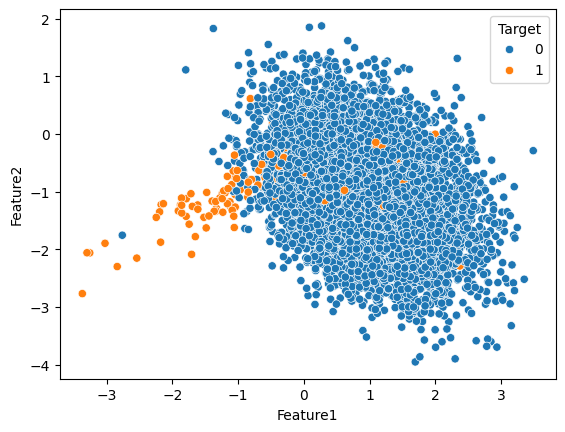

In [132]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df)

Train Test Split


In [133]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [134]:
class_weight= [{0:w,1:y} for w in [1,10,25,50,100] for y in [1,10,25,50,100]]

In [135]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 25},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 25},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 25, 1: 1},
 {0: 25, 1: 10},
 {0: 25, 1: 25},
 {0: 25, 1: 50},
 {0: 25, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 25},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 25},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

**Hyper Parameter Tuning **

In [136]:
logic=LogisticRegression()
penalty=['l1','l2','elasticnet']
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
C=[1,100,0.1,0,0.01,0.001,10]
class_weight= [{0:w,1:y} for w in [1,10,25,50,100] for y in [1,10,25,50,100]]

In [137]:
params=dict(penalty=penalty, solver=solver, C=C, class_weight=class_weight)

In [138]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'C': [1, 100, 0.1, 0, 0.01, 0.001, 10],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 25},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 25},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 25, 1: 1},
  {0: 25, 1: 10},
  {0: 25, 1: 25},
  {0: 25, 1: 50},
  {0: 25, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 25},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 25},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [139]:
grid=GridSearchCV(estimator=logic,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 100, 0.1, 0, 0.01, 0.001, 10],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 25}, {0: 1, 1: 50},
                                          {0: 1, 1: 100}, {0: 10, 1: 1},
                                          {0: 10, 1: 10}, {0: 10, 1: 25},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 25, 1: 1}, {0: 25, 1: 10},
                                          {0: 25, 1: 25}, {0: 25, 1: 50},
                                          {0: 25, 1: 100}, {0: 50, 1: 1},
                                          {0: 50, 1: 10}, {0: 50, 1: 25},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 25}, {0: 100, 1: 50},
                                          {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [140]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 25, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [141]:
grid.best_score_

0.989875

In [142]:
y_pred=grid.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9865
[[1962   25]
 [   2   11]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1987
           1       0.31      0.85      0.45        13

    accuracy                           0.99      2000
   macro avg       0.65      0.92      0.72      2000
weighted avg       0.99      0.99      0.99      2000



# **Logisric Regresson with ROC Curve and ROC AUC Score**

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

In [144]:
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                   n_redundant=0,random_state=10)

In [145]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=89)

**Creating a dummy model with default output as 0**

In [146]:
dummy_model=[0 for i in range(len(y_test))]
dummy_model

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [147]:
logic=LogisticRegression()
logic.fit(X_train,y_train)

LogisticRegression()

In [148]:
model_prob=logic.predict_proba(X_test)

In [149]:
model_prob=model_prob[:,1] # for only one +ve value

# **ROC AUC SCORE**

In [150]:
dummy_score=roc_auc_score(y_test,dummy_model)
print('Dummy Model: ROC AUC=%.2f' %(dummy_score))

Dummy Model: ROC AUC=0.50


In [151]:
model_score=roc_auc_score(y_test, model_prob)
print('Logistic Model: ROC AUC=%.2f' %(model_score))

Logistic Model: ROC AUC=0.97


**ROC Curve**

In [152]:
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model)
model_fpr,model_tpr,threshold=roc_curve(y_test,model_prob)

In [153]:
threshold

array([1.99998237e+00, 9.99982371e-01, 9.78638414e-01, 9.78265142e-01,
       9.75525891e-01, 9.75193964e-01, 9.70433452e-01, 9.70414672e-01,
       9.63528907e-01, 9.63408102e-01, 9.56938869e-01, 9.56788272e-01,
       9.44630922e-01, 9.43511198e-01, 9.43210714e-01, 9.42424641e-01,
       9.41991424e-01, 9.41699443e-01, 9.39591433e-01, 9.39471202e-01,
       9.39241441e-01, 9.38027954e-01, 9.36839852e-01, 9.36606342e-01,
       9.34686491e-01, 9.34625744e-01, 9.31651695e-01, 9.31575254e-01,
       9.28627423e-01, 9.28226662e-01, 9.19402382e-01, 9.19007378e-01,
       9.17686137e-01, 9.17621566e-01, 9.06434790e-01, 9.06119590e-01,
       9.02431407e-01, 9.02197877e-01, 8.93127082e-01, 8.92956008e-01,
       8.83903470e-01, 8.83684542e-01, 8.82086861e-01, 8.81173148e-01,
       8.79267678e-01, 8.78255159e-01, 8.77188231e-01, 8.76986880e-01,
       8.76761423e-01, 8.76753746e-01, 8.75921954e-01, 8.75178385e-01,
       8.68520960e-01, 8.68219279e-01, 8.61587303e-01, 8.61345733e-01,
      

# **Plotting ROC curve**

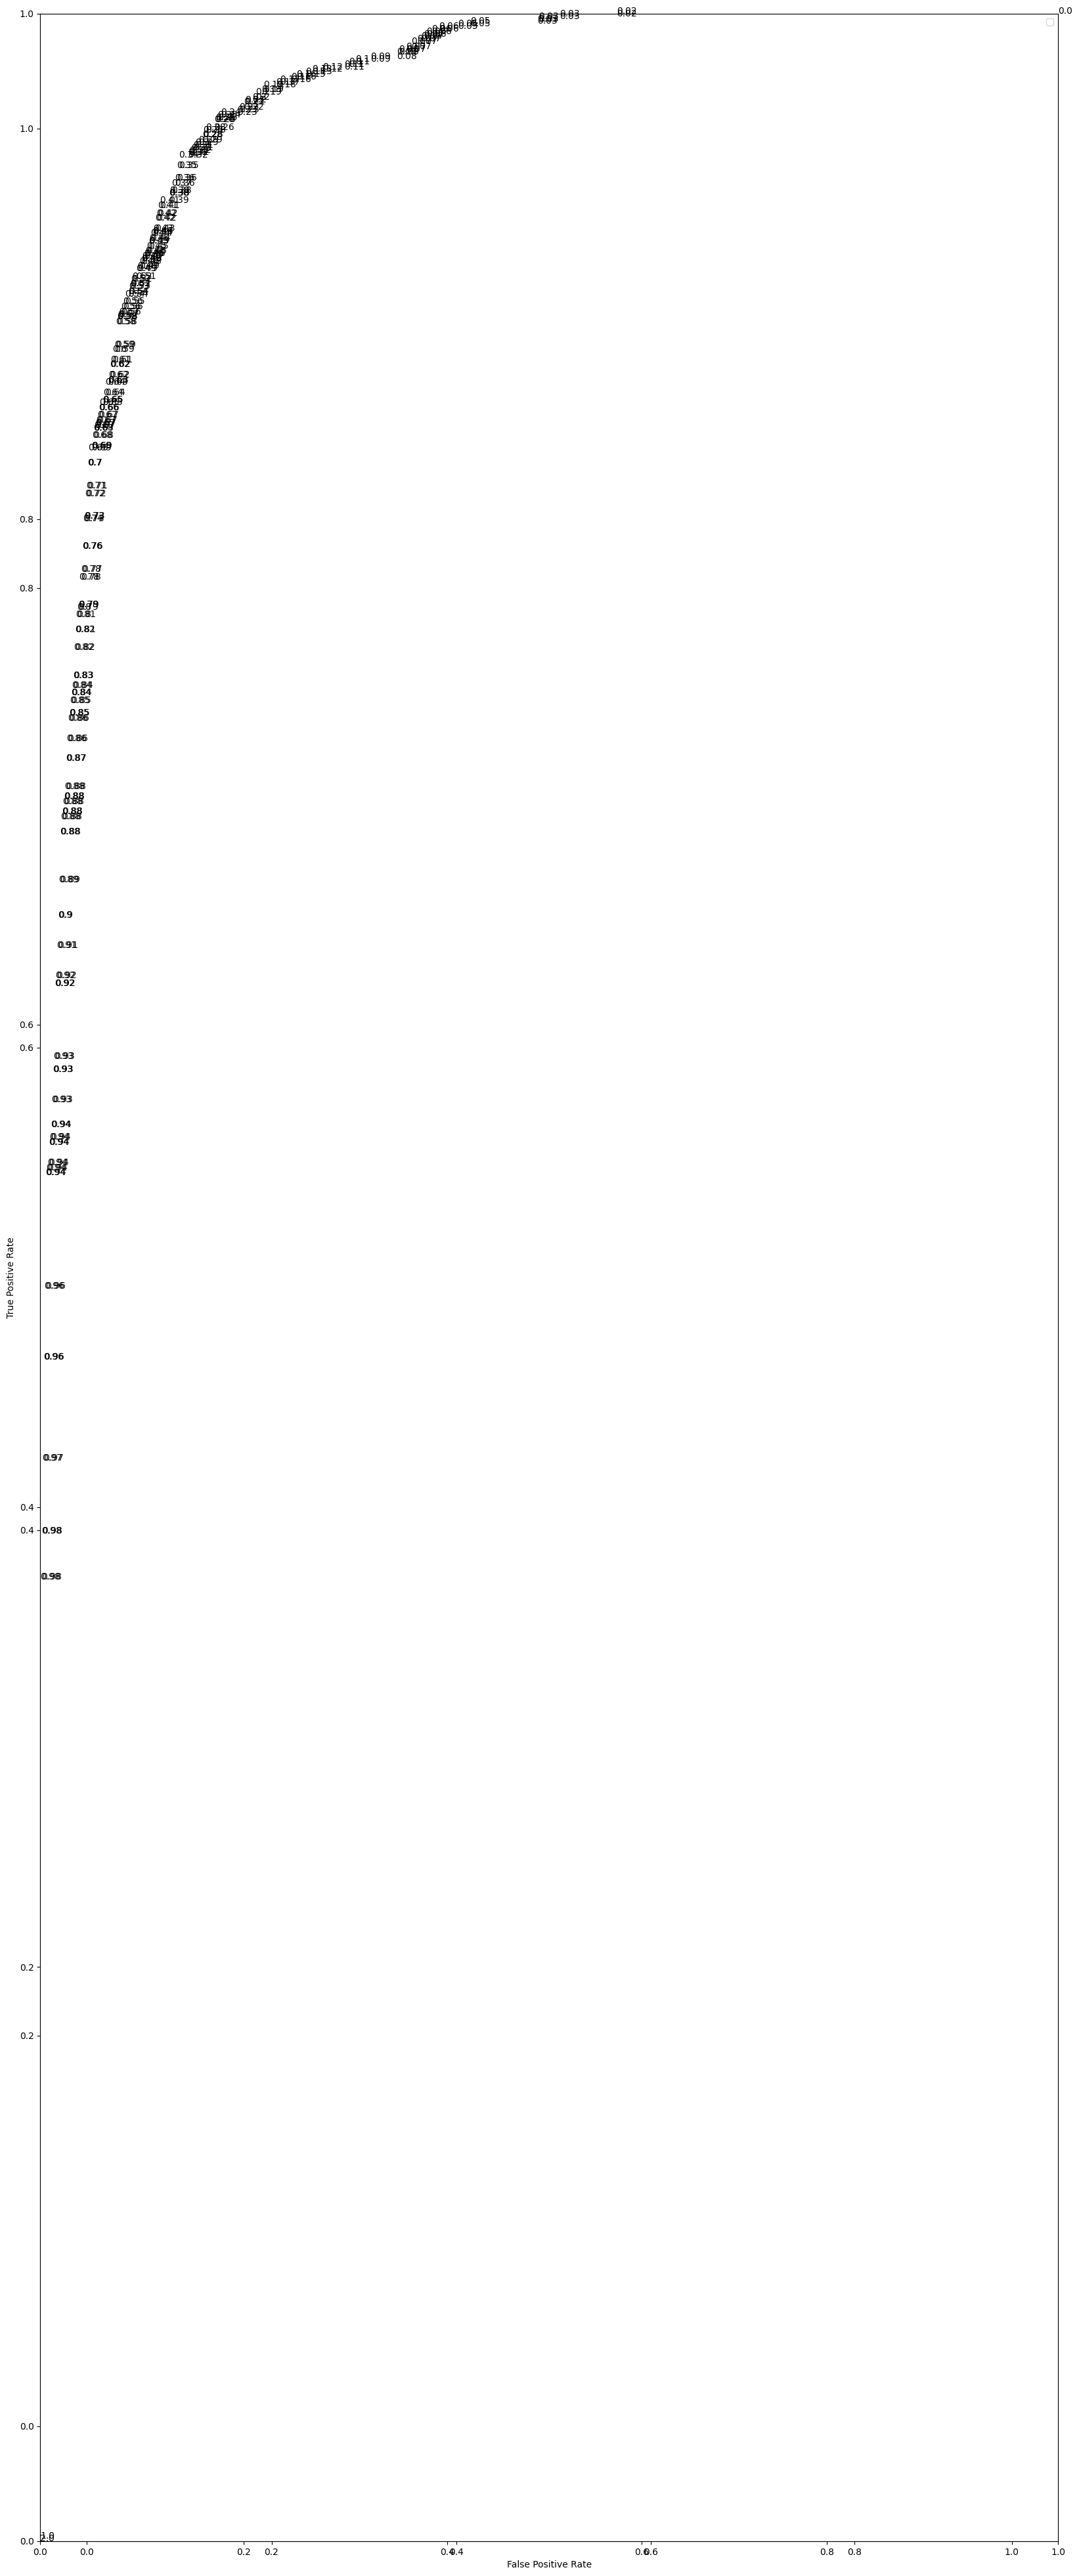

In [154]:

import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,threshold):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()